# DIABETICS PREDICTION

Goal :: Based on given features, by using relevant features a person has to be classified either as diabetic or non-diabetic

## Data preprocessing 

In [2]:
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#Reading data into pandas dataframe

data = pd.read_csv('diabetes.csv')

In [4]:
#viewing first five rows of dataframe

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Observation:: data is having eight features which can effect the label and label is having 1 and 0 as outcome. 1 being diabetic and 0 meaning not diabetic

In [5]:
#getting number of rows and columns

data.shape

(768, 9)

Observation:: There are 768 rows of data

In [53]:
#Getting data types of columns

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Observation:: All the columns are in correct data types

In [54]:
#Checking for null values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation:: No null values in the data

As our label is categorical there won't be any outliers

In [55]:
#getting statistical measures of data

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation:: If features are max then outcome is positive. If they are min then the outcome is negative

In [56]:
#getting diabetic and non diabetic cases count

data['Outcome'].value_counts() #data is not evenly distributed so we will do standardization

0    500
1    268
Name: Outcome, dtype: int64

Observation:: Data is not uniform. There are more non diabetic people than diabetic, Data should be standardized

In [57]:
#getting mean of features of diabetic and nondiabetic

data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


The mean value of 0(" non diabetic") is less than the ("diabetic people") 1. 
Diabetes means sugar level. The glucose in diabetic is more than the non diabetic
skin thickness is also more in diabetic people.

## Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

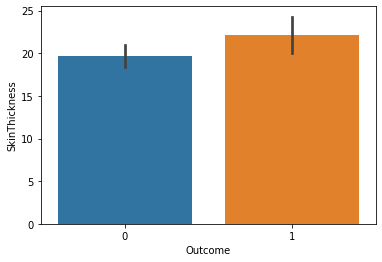

In [58]:
# Barplot of outcome and skin thickness

sns.barplot(x = data.Outcome, y = data.SkinThickness)

Observation:: People having more skin thickness is diabetic

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

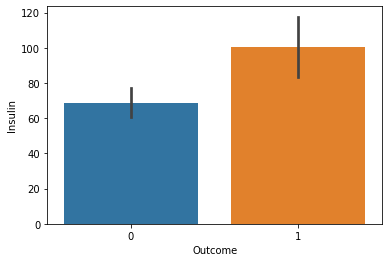

In [59]:
#barplot of outcome and insulin

sns.barplot(x = data.Outcome, y = data.Insulin)

Observation::People having more Insulin are tend to be diabetic

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

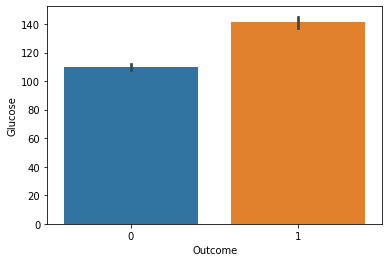

In [60]:
#barplot of outcome and glucose

sns.barplot(x = data.Outcome, y = data.Glucose)

Observation:: People with more glucose in blood are tend to be diabetic

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

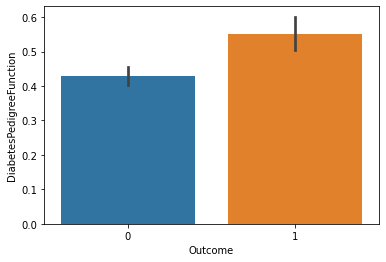

In [61]:
# barplot of outcome and diabetics pedigree function

sns.barplot(x = data.Outcome, y = data.DiabetesPedigreeFunction)

Observation:: diabetics can be heriditary as Diabetics pedigree function increases diabetics cases increases

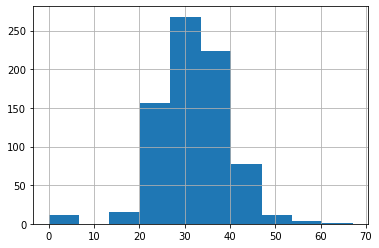

In [62]:
# univariant analysis

data.BMI.hist()
plt.show()

Observation:: Majority of BMI is concentrated in between 20 - 40 range

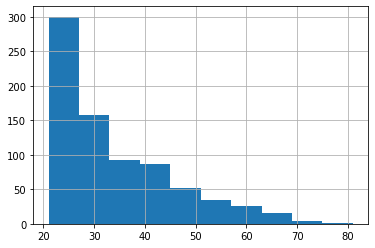

In [63]:
data.Age.hist()
plt.show()

Observation:: Mostly 20 - 30 age range data is present in the dataset

<AxesSubplot:>

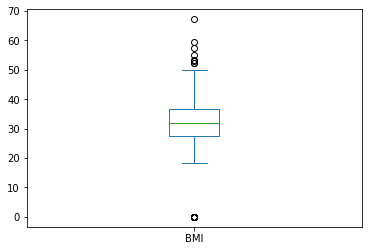

In [64]:
# Box plot of BMI

data.BMI.plot(kind='box')

Observation:: BMi has outliers and median of the BMI is 35.

<AxesSubplot:>

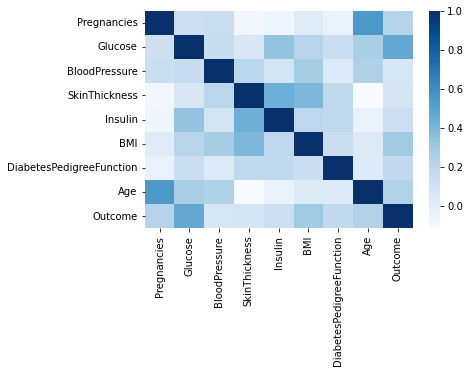

In [6]:
# finding out co-orelation 

data_corr = data.corr()
sns.heatmap(data_corr, cmap = "Blues")

Observation:: There is a positive co-relation between Outcome and Glucose, BMI, skinthickness, Insulin are related positively 

In [65]:
#splitting data and label

x = data.drop(columns = 'Outcome', axis = 1)
y = data['Outcome']
print(x,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [66]:
#data standardization

scaler = StandardScaler()

In [67]:
# fitting data into te object

scaler.fit(x)

StandardScaler()

In [68]:
# transforming the data

standardized_data = scaler.transform(x)

Standardizing the data by standard scaler method and stretching the object horizontally

In [69]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [70]:
#updating variables

X = standardized_data
Y = data['Outcome']

In [71]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Splitting and Training

In [72]:
#splitting into testing and training data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = y, random_state = 2)

In [73]:
#size of x and x_test

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [74]:
#training the model

classifier = svm.SVC(kernel = 'linear')

In [75]:
#training the svm model

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Evaluating Model

In [76]:
#Evaluating model(Accuracy score)

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy of taining data:", training_data_accuracy)

Accuracy of taining data: 0.7866449511400652


In [77]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy of test data:", testing_data_accuracy)

Accuracy of test data: 0.7727272727272727


## Building A Classification System

In [78]:
#Making a classification system

input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)

#converting data into array
input_data_array = np.asarray(input_data)

#reshaping the array as we are predicting one intsance
input_data_reshaped = input_data_array.reshape(1,-1)

#Standaridizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if  (prediction[0]==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")



[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic
